In [2]:
from functools import reduce
import re
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.optimize import linear_sum_assignment
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings('ignore')

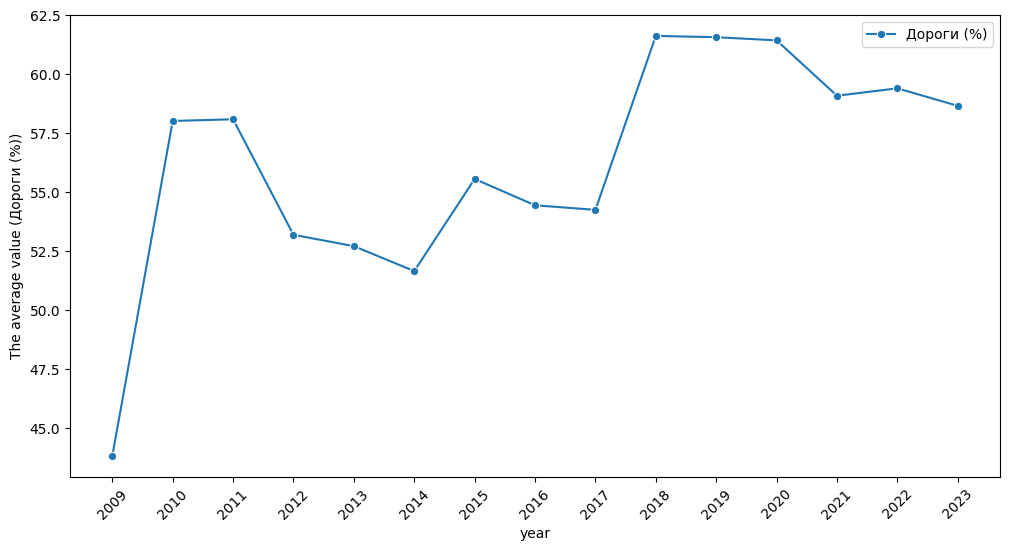

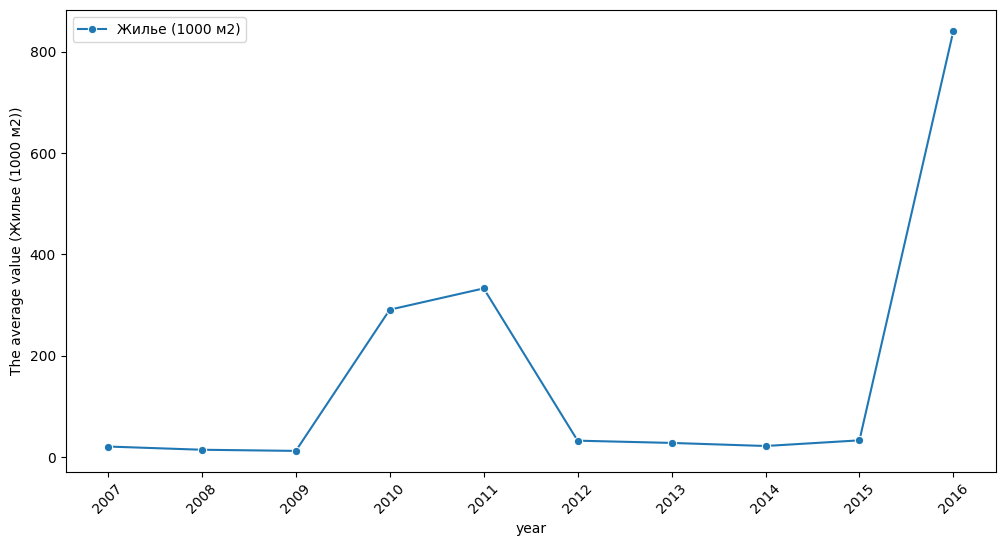

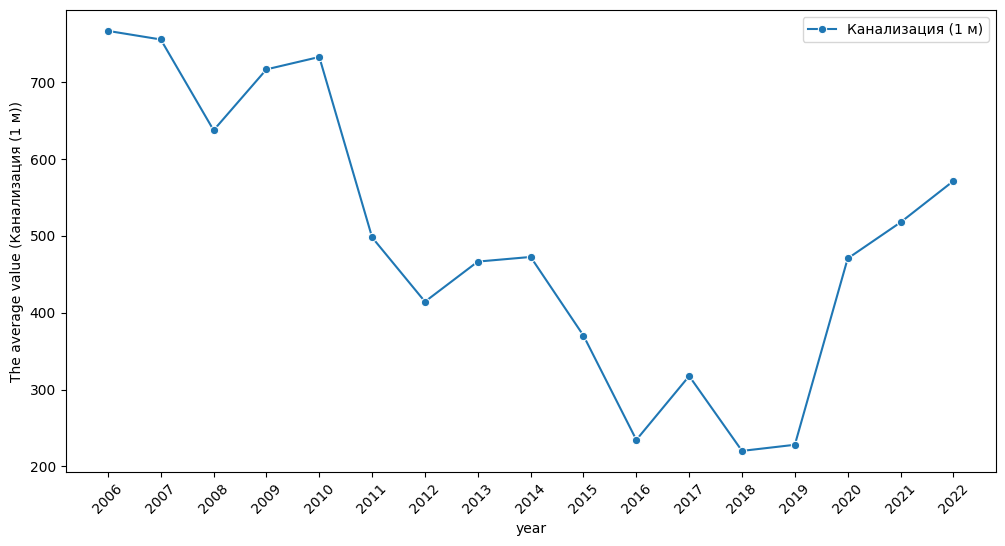

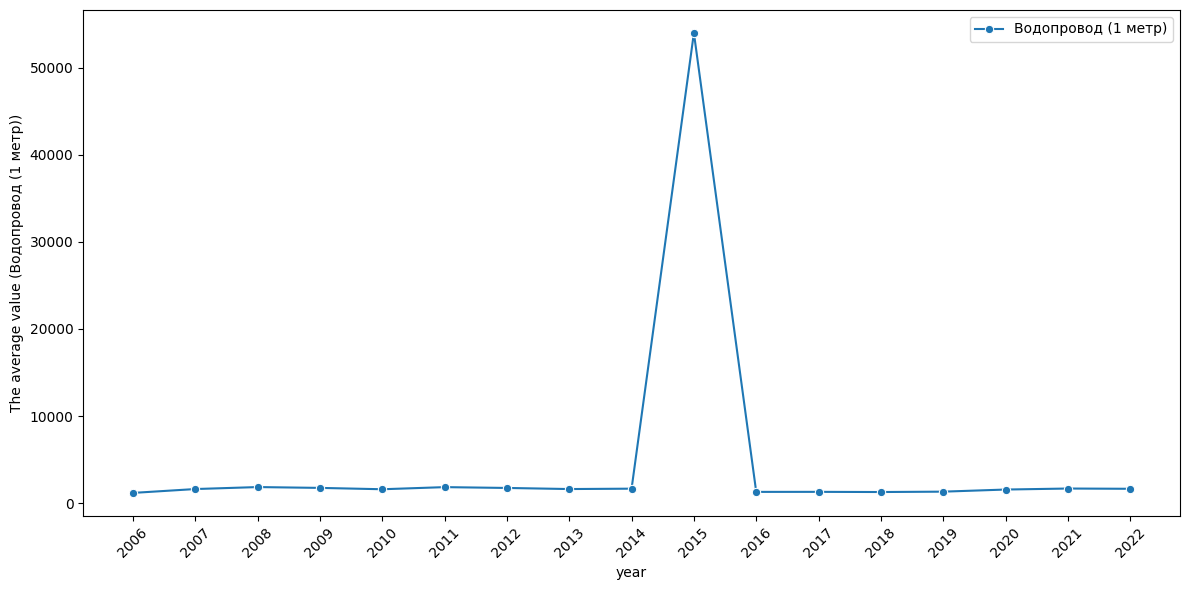

In [ ]:

dorogi = pd.read_csv('дороги (доля плохих).csv')
zhile = pd.read_csv('жилье (аварийное).csv')
kan = pd.read_csv('канализация (отремонтировано).csv')
vod = pd.read_csv('водопровод (отремонтировано).csv')

# Преобразуем данные для графиков (расчет среднего по годам)
dorogi_avg = dorogi.groupby('year')['Дороги (%)'].mean().reset_index()
zhile_avg = zhile.groupby('year')['Жилье (1000 м2)'].mean().reset_index()
kan_avg = kan.groupby('year')['Канализация (1 м)'].mean().reset_index()
vod_avg = vod.groupby('year')['Водопровод (1 метр)'].mean().reset_index()

# График 1: Дороги (%)
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.lineplot(
    data=dorogi_avg,
    x='year', y='Дороги (%)',
    ax=ax1,
    marker='o',
    label='Дороги (%)'
)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('The average value (Дороги (%))')
ax1.tick_params(axis='y')

# График 2: Жилье (1000 м2)
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.lineplot(
    data=zhile_avg,
    x='year', y='Жилье (1000 м2)',
    ax=ax1,
    marker='o',
    label='Жилье (1000 м2)'
)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('The average value (Жилье (1000 м2))')
ax1.tick_params(axis='y')

# График 3: Канализация (1 м)
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.lineplot(
    data=kan_avg,
    x='year', y='Канализация (1 м)',
    ax=ax1,
    marker='o',
    label='Канализация (1 м)'
)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('The average value (Канализация (1 м))')
ax1.tick_params(axis='y')

# График 4: Водопровод (1 метр)
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.lineplot(
    data=vod_avg,
    x='year', y='Водопровод (1 метр)',
    ax=ax1,
    marker='o',
    label='Водопровод (1 метр)'
)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('The average value (Водопровод (1 метр))')
ax1.tick_params(axis='y')

# Показать графики
plt.tight_layout()
plt.show()


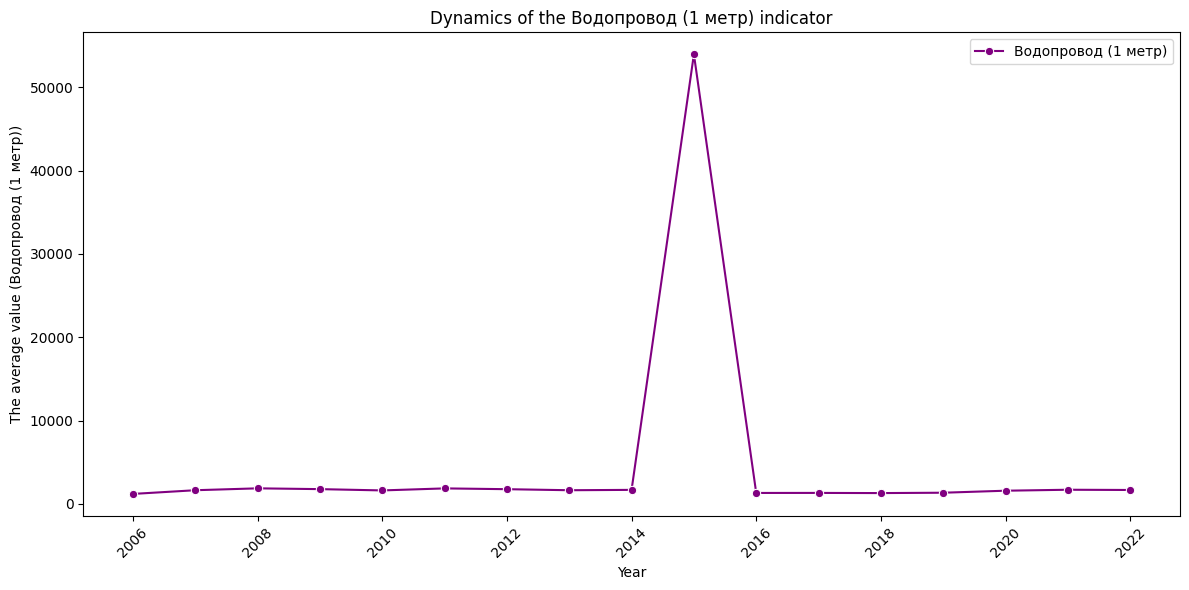

Среднее значение Водопровод (1 метр) за все года, кроме 2015: 1593.18 метров
Среднее значение Водопровод (1 метр) за 2015 год: 53972.140521021414
Среднее значение Водопровод (1 метр) на один муниципалитет за 2015 год (без Карелии и Кемерово): 3518.36 метров


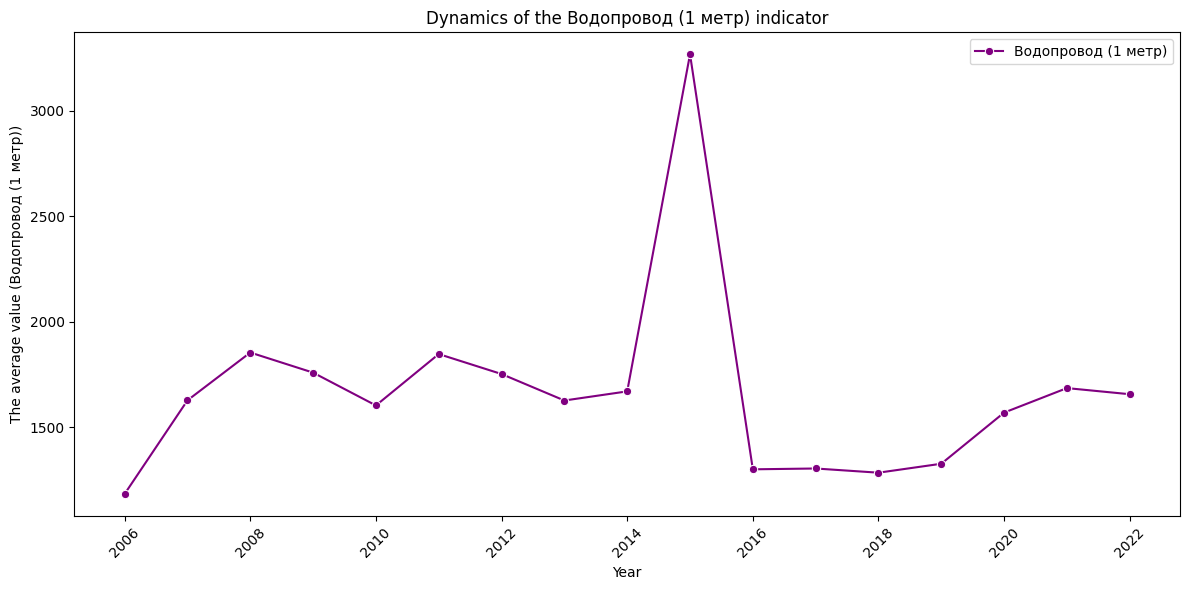

,region_name,municipality,Водопровод (1 метр)
0,Кемеровская область,Кемеровский,15700000.0
1,Кемеровская область,Прокопьевский муниципальный район,14900000.0
2,Кемеровская область,Сельские поселения Ленинск-Кузнецкого муниципа...,11800000.0
3,Кемеровская область,Ленинск-Кузнецкий муниципальный район,11800000.0
4,Кемеровская область,Вагановское,9000000.0
5,Кемеровская область,Промышленновский муниципальный район,9000000.0
6,Кемеровская область,Новокузнецкий муниципальный район,8100000.0
7,Кемеровская область,Крапивинский муниципальный район,7400000.0
8,Кемеровская область,Таштагольский муниципальный район,6300000.0
9,Кемеровская область,Сельские поселения Кемеровского муниципального...,5600000.0


In [ ]:
df = pd.read_csv('водопровод (отремонтировано).csv')

vod_avg = df.groupby('year')['Водопровод (1 метр)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=vod_avg,
    x='year', y='Водопровод (1 метр)',
    marker='o',
    label='Водопровод (1 метр)',
    color='purple'
)
plt.title('Dynamics of the Водопровод (1 метр) indicator')
plt.xlabel('Year')
plt.ylabel('The average value (Водопровод (1 метр))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mean_except_2015 = df[df['year'] != 2015]['Водопровод (1 метр)'].mean()
print(f'Среднее значение Водопровод (1 метр) за все года, кроме 2015: {mean_except_2015:.2f} метров')




df_2015 = df[df['year'] == 2015]
mean_value = df_2015['Водопровод (1 метр)'].mean()
print(f'Среднее значение Водопровод (1 метр) за 2015 год: {mean_value}')


df_2015_filtered = df_2015[
    (df_2015['region_name'] != 'Республика Карелия') &
    (df_2015['region_name'] != 'Кемеровская область')
]


municipality_sums = (
    df_2015_filtered
    .groupby('municipality')['Водопровод (1 метр)']
    .sum()
)
mean_per_municipality = municipality_sums.mean()

print(f'Среднее значение Водопровод (1 метр) на один муниципалитет за 2015 год '
      f'(без Карелии и Кемерово): {mean_per_municipality:.2f} метров')

top50 = (
    df_2015
    .sort_values(by='Водопровод (1 метр)', ascending=False)
    [['region_name', 'municipality', 'Водопровод (1 метр)']]
    .head(50)
    .reset_index(drop=True)
)

df_new = df.copy()
mask = (
    (df_new['year'] == 2015) &
    (
        (df_new['region_name'] == 'Республика Карелия') |
        (df_new['region_name']  == 'Кемеровская область')
    )
)

df_new.loc[mask, 'Водопровод (1 метр)'] = mean_except_2015






df_new.to_csv('водопровод (new).csv', index=False)

vod_avg = df_new.groupby('year')['Водопровод (1 метр)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=vod_avg,
    x='year', y='Водопровод (1 метр)',
    marker='o',
    label='Водопровод (1 метр)',
    color='purple'
)
plt.title('Dynamics of the Водопровод (1 метр) indicator')
plt.xlabel('Year')
plt.ylabel('The average value (Водопровод (1 метр))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top50


In [ ]:
dorogi = pd.read_csv('дороги (доля плохих).csv') 
zhile = pd.read_csv('жилье (аварийное).csv') 
kan = pd.read_csv('канализация (отремонтировано).csv') 
vod = pd.read_csv('водопровод (отремонтировано).csv') 
# vod = pd.read_csv('водопровод (new).csv') 
etna = pd.read_csv('этно_рус.csv') 
rab = pd.read_csv('население_работа.csv') 
urban = pd.read_csv('население_город.csv') 
income_reg = pd.read_csv('доходы (среднедушевые).csv') 
income_mun = pd.read_csv('доходы (муницип, тыс.р.).csv') 

dorogi['Дороги (%)'] = pd.to_numeric(dorogi['Дороги (%)'], errors='coerce')
mask = (dorogi['Дороги (%)'].notna())
dorogi.loc[mask, 'Дороги (%)'] = 100 - dorogi.loc[mask, 'Дороги (%)']

dorogi.fillna(0, inplace=True)
zhile.fillna(0, inplace=True)
kan.fillna(0, inplace=True)
vod.fillna(0, inplace=True)
etna.fillna(0, inplace=True)
rab.fillna(0, inplace=True)
urban.fillna(0, inplace=True)
income_reg.fillna(0, inplace=True)
income_mun.fillna(0, inplace=True)




dorogi.to_csv('дороги_new.csv', index=False)
zhile.to_csv('жилье_new.csv', index=False)
kan.to_csv('канализация_new.csv', index=False)
vod.to_csv('водопровод_new.csv', index=False)
etna.to_csv('этно_рус_new.csv', index=False)
rab.to_csv('население_работа_new.csv', index=False)
urban.to_csv('население_город_new.csv', index=False)
income_reg.to_csv('доходы_душа_new.csv', index=False)
income_mun.to_csv('доходы_муни_new.csv', index=False)
dorogi

,Критерий,region_name,municipality,oktmo,year,Дороги (%),indicator_unit
0,Дороги,Алтайский край,Залесовский муниципальный округ,1512000,2022,90.50,Процент
1,Дороги,Алтайский край,Залесовский муниципальный округ,1512000,2023,89.60,Процент
2,Дороги,Алтайский край,Муниципальный округ город Славгород,1539000,2023,4.90,Процент
3,Дороги,Алтайский край,Муниципальный округ Суетский район,1541000,2023,25.60,Процент
4,Дороги,Алтайский край,Муниципальный округ Чарышский район,1558000,2023,4.90,Процент
...,...,...,...,...,...,...,...
59378,Дороги,Еврейская автономная область,Биробиджан,99701000,2019,39.69,Процент
59379,Дороги,Еврейская автономная область,Биробиджан,99701000,2020,3.10,Процент
59380,Дороги,Еврейская автономная область,Биробиджан,99701000,2021,39.00,Процент
59381,Дороги,Еврейская автономная область,Биробиджан,99701000,2022,39.00,Процент
